# Analysis of Crimes in India

### Import Statements

In [1]:
# To install geopandas
!pip install geopandas

# install kaggle
#!pip install kaggle

     |████████████████████████████████| 1.0MB 5.5MB/s 
     |████████████████████████████████| 14.8MB 311kB/s 
     |████████████████████████████████| 6.5MB 39.8MB/s 


In [2]:
# Import Statements

from google.colab import files

import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline()

In [3]:
# Import the datasets from google drive
from google.colab import drive
drive.mount('/content/drive')

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/dataset/"

Mounted at /content/drive


In [ ]:
# Move into the '/content' directory
#%cd /content

"""# Create folder for crime data
%mkdir india-crime
%cd ./india-crime/

# Upload the crime stats files from your local desktop
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

%cd ../"""



"""# Create folder for gis data
%mkdir india-gis
%cd ./india-gis/

# Upload the gis files from your local desktop
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

%cd ../"""


#!kaggle datasets download -d nehaprabhavalkar/india-gis-data

### Reference : Plotting India Map

In [ ]:
shp_gdf = gpd.read_file(BASE_PATH + 'india-gis/India States/Indian_states.shp')
shp_gdf

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [ ]:
merged = shp_gdf.set_index('st_nm').join(df.set_index('States'))
merged.head()

In [ ]:
# Plotting India Map
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Paramedical Staffs at District Hospitals in India as of 31st March 2019',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Staff', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

## 1. Human Rights Violation by Police

In [93]:
# Reading the csv file

police_hr = pd.read_csv(BASE_PATH + 'india-crime/35_Human_rights_violation_by_police.csv')
police_hr.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Registered_under_Human_Rights_Violations,Policemen_Chargesheeted,Policemen_Convicted
0,Andhra Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
1,Arunachal Pradesh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
2,Assam,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
3,Bihar,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0
4,Chandigarh,2001,HR_Disappearance of Persons,01. Disappearance of Persons,0.0,0.0,0.0


### 1.1 State wise Cases registered under Human Rights Violations 

In [94]:
# Plotting the data on the map of India

g1_1 = pd.DataFrame(police_hr.groupby(['Area_Name'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())
g1_1.columns = ['State/UT','Cases Reported']
g1_1.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)
telangana = {
    'State/UT' : 'Telangana',
    'Cases Reported' : g1_1.loc[g1_1['State/UT'] == 'Andhra Pradesh']['Cases Reported'].values[0]
}
g1_1 = g1_1.append(telangana, ignore_index=True)

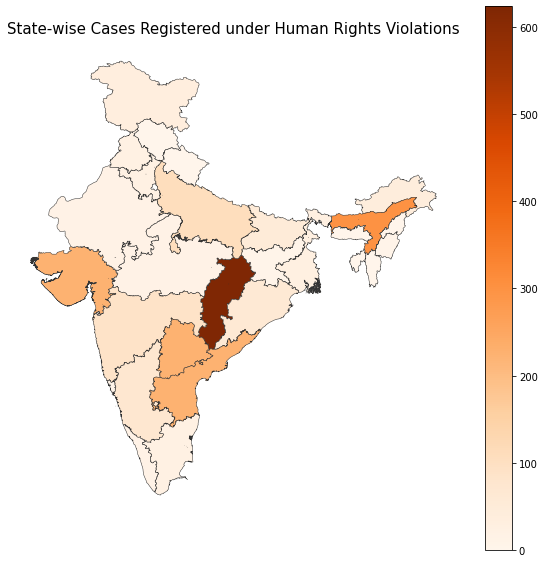

In [95]:
shp_gdf = gpd.read_file(BASE_PATH + 'india-gis/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g1_1.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Cases Registered under Human Rights Violations',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='Oranges', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

### 1.2 Types of Crimes under this Category

In [ ]:
police_hr.Group_Name.value_counts()

HR_Total Violations by Police                 214
HR_Others Violations by Police                194
HR_Disappearance of Persons                   190
HR_Extortion                                  190
HR_Torture                                    190
HR_Atrocities on SC/ST                        188
HR_Illegal detention/arrests                  186
HR_Indignity to Women                         185
HR_Fake encounter killings                    185
HR_False implication                          182
HR_Violation against Terrorists/Extremists    182
HR_Failure in taking action                   181
Name: Group_Name, dtype: int64

### 1.3 Cases registered against Police under Human Rights Violations

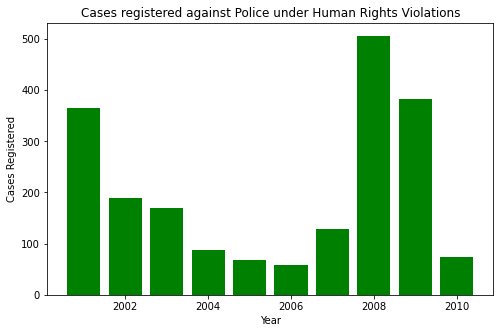

In [ ]:
g3 = pd.DataFrame(police_hr.groupby(['Year'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())
g3.columns = ['Year','Cases Registered']

plt.figure(figsize=(8, 5))
plt.bar(g3['Year'].values, g3['Cases Registered'].values, color='green')
plt.xlabel('Year')
plt.ylabel('Cases Registered')
plt.title('Cases registered against Police under Human Rights Violations')
plt.show()

### 1.4 Policemen Chargesheeted vs Policemen Convicted 

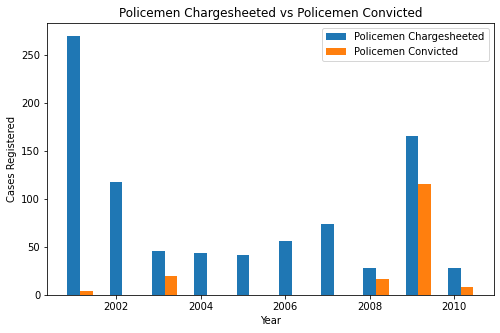

In [ ]:
g4 = pd.DataFrame(police_hr.groupby(['Year'])['Policemen_Chargesheeted','Policemen_Convicted'].sum().reset_index())

width =0.3
plt.figure(figsize=(8, 5))
plt.bar(g4['Year'].values, g4['Policemen_Chargesheeted'].values, width=width)
plt.bar(g4['Year'].values + width, g4['Policemen_Convicted'].values, width=width)
plt.xlabel('Year')
plt.ylabel('Cases Registered')
plt.title('Policemen Chargesheeted vs Policemen Convicted')
plt.legend(['Policemen Chargesheeted', 'Policemen Convicted'])
plt.show()

## 2. Auto Theft Cases

In [90]:
# Reading the CSV file

auto_theft = pd.read_csv(BASE_PATH + 'india-crime/30_Auto_theft.csv')

### 2.1 State/UT wise number of vehicles stolen from 2001 to 2010

In [91]:
g2_1 = pd.DataFrame(auto_theft.groupby(['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())
g2_1.columns = ['State/UT','Vehicle_Stolen']
g2_1.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)
telangana = {
    'State/UT' : 'Telangana',
    'Vehicle_Stolen' : g2_1.loc[g2_1['State/UT'] == 'Andhra Pradesh']['Vehicle_Stolen'].values[0]
}
g2_1 = g2_1.append(telangana, ignore_index=True)

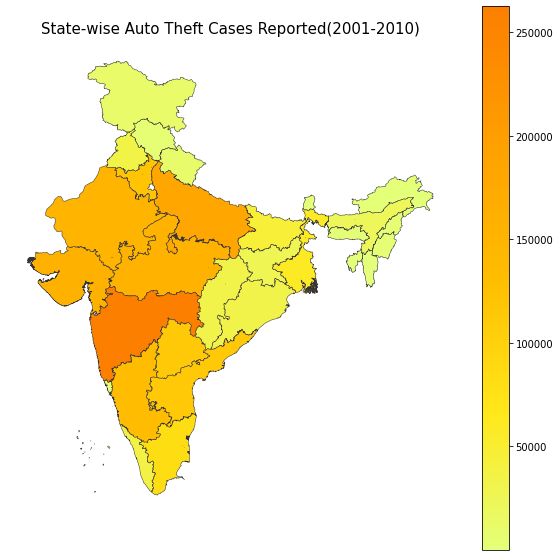

In [92]:
shp_gdf = gpd.read_file(BASE_PATH + 'india-gis/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g2_1.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Auto Theft Cases Reported(2001-2010)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Vehicle_Stolen', cmap='Wistia', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

### 2.2 Proportion of vehicles stolen, traced and recovered

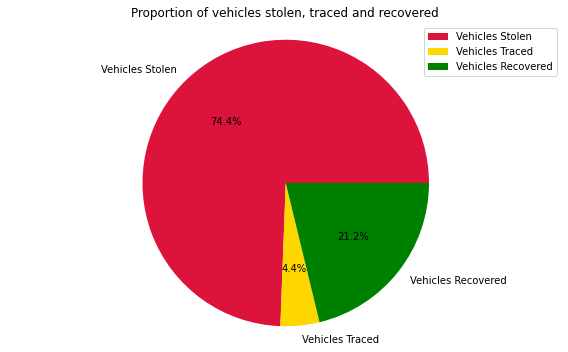

In [ ]:
auto_theft_traced = auto_theft['Auto_Theft_Coordinated/Traced'].sum()
auto_theft_recovered = auto_theft['Auto_Theft_Recovered'].sum()
auto_theft_stolen = auto_theft['Auto_Theft_Stolen'].sum()

vehicle_group = ['Vehicles Stolen','Vehicles Traced','Vehicles Recovered']
vehicle_vals = [auto_theft_stolen, auto_theft_traced, auto_theft_recovered]

colors = ['crimson','gold','green']

plt.figure(figsize=(8, 5))
plt.pie(vehicle_vals, colors=colors, labels=vehicle_group, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(vehicle_group)
plt.title('Proportion of vehicles stolen, traced and recovered')
plt.tight_layout()
plt.show()

### 2.3 Year wise vehicles stolen

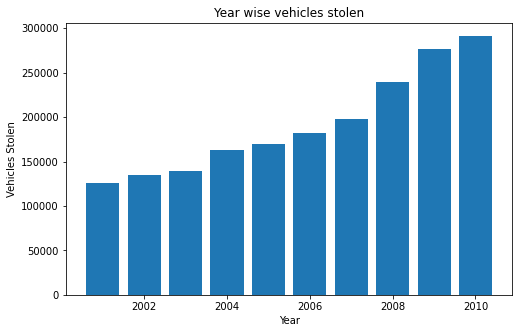

In [ ]:
g2_3 = pd.DataFrame(auto_theft.groupby(['Year'])['Auto_Theft_Stolen'].sum().reset_index())
g2_3.columns = ['Year','Vehicles Stolen']

plt.figure(figsize=(8, 5))
plt.bar(g2_3['Year'], g2_3['Vehicles Stolen'])
plt.xlabel('Year')
plt.ylabel('Vehicles Stolen')
plt.title('Year wise vehicles stolen')
plt.show()

### 2.4 Top 10 States/UT with highest number of motor cycles stolen

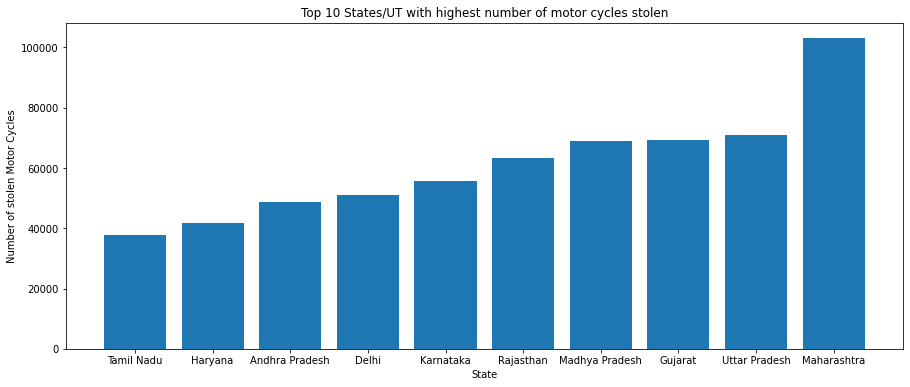

In [ ]:
motor_c = auto_theft[auto_theft['Sub_Group_Name']=='1. Motor Cycles/ Scooters']

g2_4 = pd.DataFrame(motor_c.groupby(['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())
g2_4_sorted = g2_4.sort_values(['Auto_Theft_Stolen'],ascending=True)
plt.figure(figsize=(15, 6))
plt.bar(g2_4_sorted.iloc[-10:,:]['Area_Name'].values, g2_4_sorted.iloc[-10:,:]['Auto_Theft_Stolen'].values)
plt.xlabel('State')
plt.ylabel('Number of stolen Motor Cycles')
plt.title('Top 10 States/UT with highest number of motor cycles stolen')
plt.show()

## 3. Property Theft Cases

In [87]:
# Reading the CSV File

prop_theft = pd.read_csv(BASE_PATH + 'india-crime/10_Property_stolen_and_recovered.csv')
prop_theft.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937


### 3.1 State/UT wise number of property stolen cases from 2001 to 2010 

In [88]:
g3_1 = pd.DataFrame(prop_theft.groupby(['Area_Name'])['Cases_Property_Stolen'].sum().reset_index())
g3_1.columns = ['State/UT','Cases Reported']
g3_1.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)
telangana = {
    'State/UT' : 'Telangana',
    'Cases Reported' : g3_1.loc[g3_1['State/UT'] == 'Andhra Pradesh']['Cases Reported'].values[0]
}
g3_1 = g3_1.append(telangana, ignore_index=True)

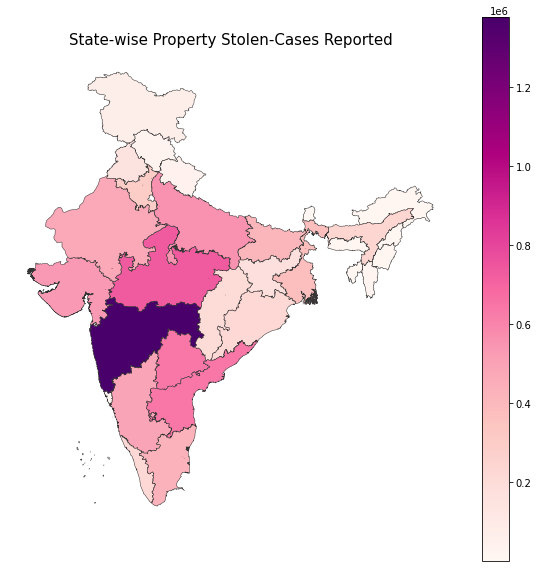

In [89]:
shp_gdf = gpd.read_file(BASE_PATH + 'india-gis/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g3_1.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Property Stolen-Cases Reported', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='RdPu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

### 3.2 Types of property stolen cases

In [26]:
g3_2 = pd.DataFrame(prop_theft.groupby(['Group_Name'])['Value_of_Property_Stolen'].sum().reset_index())
g3_2.drop(index=6, inplace=True)
g3_2.head()

,Group_Name,Value_of_Property_Stolen
0,Burglary - Property,33789815938
1,Criminal Breach of Trust - Property,59792902381
2,Dacoity -Property,16758361312
3,Other heads of Property,76661474892
4,Robbery - Property,14468566168


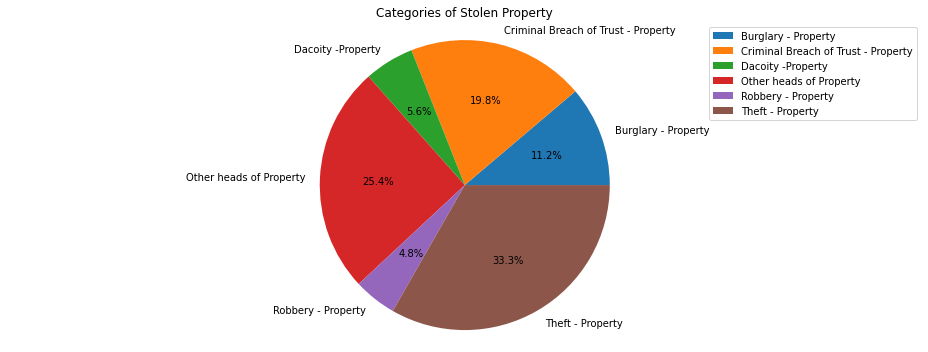

In [48]:
prop_theft_group = [gname for gname in g3_2['Group_Name'].values]
prop_theft_vals = [[row['Value_of_Property_Stolen'] for _, row in g3_2.loc[g3_2['Group_Name'] == [gname for gname in prop_theft_group]].iterrows()]]

plt.figure(figsize=(13, 5))
plt.pie(prop_theft_vals, labels=prop_theft_group, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Categories of Stolen Property')
plt.legend(prop_theft_group)
plt.tight_layout()
plt.show()

### 3.3 Property stolen vs recovered 

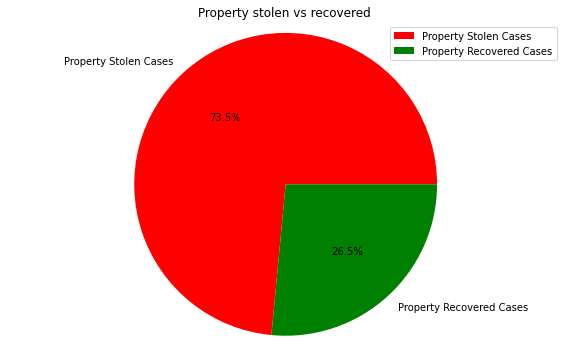

In [ ]:
prop_theft_recovered = prop_theft['Cases_Property_Recovered'].sum()
prop_theft_stolen = prop_theft['Cases_Property_Stolen'].sum()

prop_group = ['Property Stolen Cases','Property Recovered Cases']
prop_vals = [prop_theft_stolen, prop_theft_recovered]

colors = ['red','green']

plt.figure(figsize=(8, 5))
plt.pie(prop_vals, colors=colors, labels=prop_group, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Property stolen vs recovered')
plt.legend(prop_group)
plt.tight_layout()
plt.show()

### 3.4 Year-wise Value of Property Stolen and Recovered 

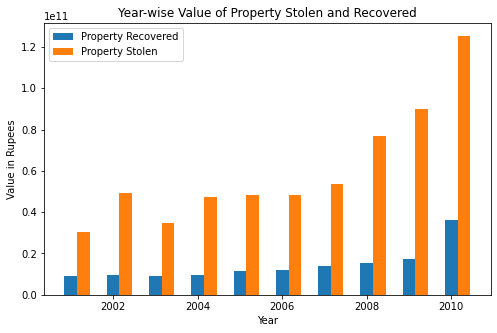

In [ ]:
g9 = pd.DataFrame(prop_theft.groupby(['Year'])['Value_of_Property_Recovered','Value_of_Property_Stolen'].sum().reset_index())

width =0.3
plt.figure(figsize=(8, 5))
plt.bar(g9['Year'].values, g9['Value_of_Property_Recovered'].values, width=width)
plt.bar(g9['Year'].values + width, g9['Value_of_Property_Stolen'].values, width=width)
plt.xlabel('Year')
plt.ylabel('Value in Rupees')
plt.title('Year-wise Value of Property Stolen and Recovered')
plt.legend(['Property Recovered', 'Property Stolen'])
plt.show()

## 4. Juvenile Crime Cases

In [84]:
# Reading the CSV Files

juvie_education = pd.read_csv(BASE_PATH + 'india-crime/18_01_Juveniles_arrested_Education.csv')
juvie_economic_setup = pd.read_csv(BASE_PATH + 'india-crime/18_02_Juveniles_arrested_Economic_setup.csv')
juvie_family = pd.read_csv(BASE_PATH + 'india-crime/18_03_Juveniles_arrested_Family_background.csv')
juvie_recdivism = pd.read_csv(BASE_PATH + 'india-crime/18_04_Juveniles_arrested_Recidivism.csv')

### 4.1 Juvenile arrests as a factor of Education

In [ ]:
juvie_education.head()

,Area_Name,Year,Sub_Group_Name,Education_Above_Primary_but_below_Matric_or_Higher_Secondary,Education_Illiterate,Education_Matric_or_Higher_Secondary_&_above,Education_Total,Education_Upto_primary
0,Andaman & Nicobar Islands,2001,1. Education,12,0,0,16,4
1,Andhra Pradesh,2001,1. Education,178,640,64,1565,683
2,Arunachal Pradesh,2001,1. Education,39,16,12,137,70
3,Assam,2001,1. Education,74,91,0,253,88
4,Bihar,2001,1. Education,87,190,56,586,253


In [85]:
g4_1 = pd.DataFrame(juvie_education.groupby(['Area_Name'])['Education_Illiterate', 'Education_Upto_primary', 'Education_Above_Primary_but_below_Matric_or_Higher_Secondary', 'Education_Matric_or_Higher_Secondary_&_above'].sum().reset_index())
g4_1.columns = ['State/UT','Illiterate', 'Upto_Primary', 'Primary_Higher', 'Higher_Above']
g4_1.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)
telangana = {
    'State/UT' : 'Telangana',
    'Illiterate' : g4_1.loc[g4_1['State/UT'] == 'Andhra Pradesh']['Illiterate'].values[0],
    'Upto_Primary' : g4_1.loc[g4_1['State/UT'] == 'Andhra Pradesh']['Upto_Primary'].values[0],
    'Primary_Higher' : g4_1.loc[g4_1['State/UT'] == 'Andhra Pradesh']['Primary_Higher'].values[0],
    'Higher_Above' : g4_1.loc[g4_1['State/UT'] == 'Andhra Pradesh']['Higher_Above'].values[0]
}
g4_1 = g4_1.append(telangana, ignore_index=True)

In [ ]:
g4_1.loc[g4_1['State/UT'] == 'Tamil Nadu']['Illiterate']

30    13215
Name: Illiterate, dtype: int64

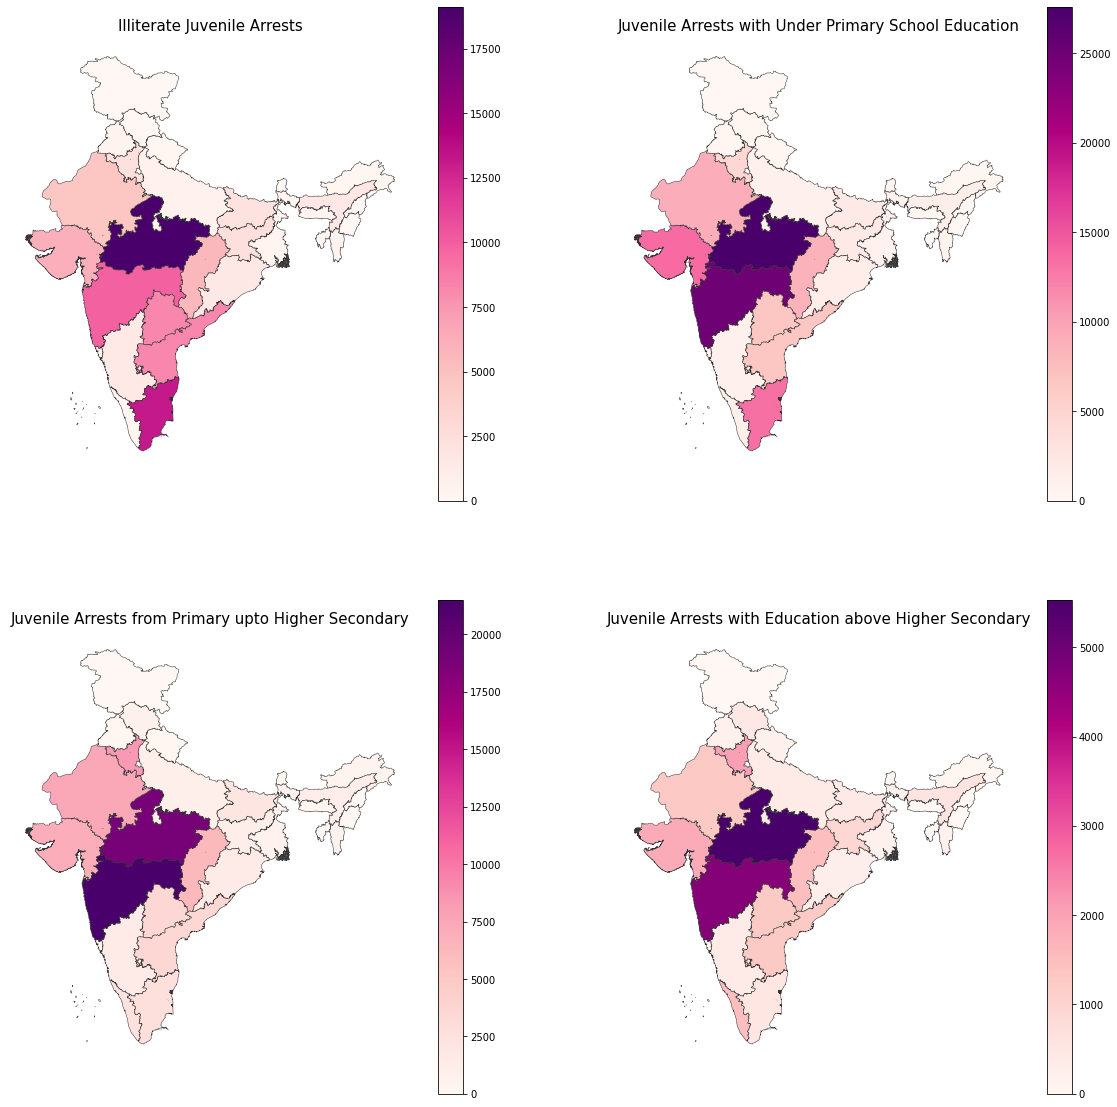

In [86]:
# Create Sub-plots
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

# Read in the India States info
shp_gdf = gpd.read_file(BASE_PATH + 'india-gis/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g4_1.set_index('State/UT'))

# To plot the juvenile illitracy arrests across states
ax[0][0].axis('off')
ax[0][0].set_title('Illiterate Juvenile Arrests', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Illiterate', cmap='RdPu', linewidth=0.5, ax=ax[0][0], edgecolor='0.2',legend=True)

# To plot the juvenile arrests with education under Primary school across states
ax[0][1].axis('off')
ax[0][1].set_title('Juvenile Arrests with Under Primary School Education', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Upto_Primary', cmap='RdPu', linewidth=0.5, ax=ax[0][1], edgecolor='0.2',legend=True)

# To plot the juvenile arrests with education higher than Primary school but under Higher Secondary across states
ax[1][0].axis('off')
ax[1][0].set_title('Juvenile Arrests from Primary upto Higher Secondary', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Primary_Higher', cmap='RdPu', linewidth=0.5, ax=ax[1][0], edgecolor='0.2',legend=True)

# To plot the juvenile arrests with education higher than Higher Secondary across states
ax[1][1].axis('off')
ax[1][1].set_title('Juvenile Arrests with Education above Higher Secondary', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Higher_Above', cmap='RdPu', linewidth=0.5, ax=ax[1][1], edgecolor='0.2',legend=True)

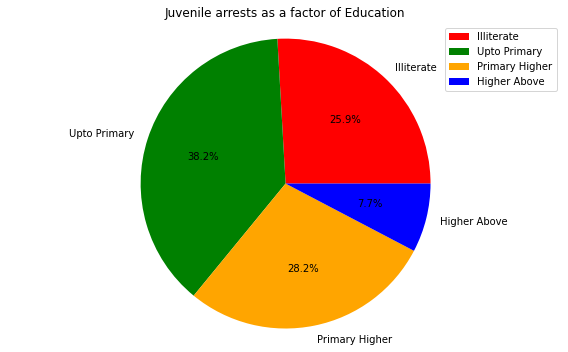

In [ ]:
illeterate = juvie_education['Education_Illiterate'].sum()
upto_primary = juvie_education['Education_Upto_primary'].sum()
primary_secondary = juvie_education['Education_Above_Primary_but_below_Matric_or_Higher_Secondary'].sum()
above_secondary = juvie_education['Education_Matric_or_Higher_Secondary_&_above'].sum()

juvie_edu_group = ['Illiterate', 'Upto Primary', 'Primary Higher', 'Higher Above']
juvie_edu_vals = [illeterate, upto_primary, primary_secondary, above_secondary]

colors = ['red','green', 'orange', 'blue']

plt.figure(figsize=(8, 5))
plt.pie(juvie_edu_vals, colors=colors, labels=juvie_edu_group, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Juvenile arrests as a factor of Education')
plt.legend(juvie_edu_group)
plt.tight_layout()
plt.show()

### 4.2 Juvenile arrests as a factor of Economic Group

In [ ]:
juvie_economic_setup.head()

,Area_Name,Year,Sub_Group_Name,Economic_Set_up_Annual_Income_250001_to_50000,Economic_Set_up_Annual_Income_upto_Rs_25000,Economic_Set_up_Middle_income_from_100001_to_200000,Economic_Set_up_Middle_income_from_50001_to_100000,Economic_Set_up_Total,Economic_Set_up_Upper_income_above_Rs_300000,Economic_Set_up_Upper_middle_income_from_200001_to_300000
0,Andaman & Nicobar Islands,2001,2. Economic Setup,12,4,0,0,16,0,0
1,Andhra Pradesh,2001,2. Economic Setup,104,1421,9,27,1565,4,0
2,Arunachal Pradesh,2001,2. Economic Setup,38,99,0,0,137,0,0
3,Assam,2001,2. Economic Setup,47,177,13,16,253,0,0
4,Bihar,2001,2. Economic Setup,213,303,12,58,586,0,0


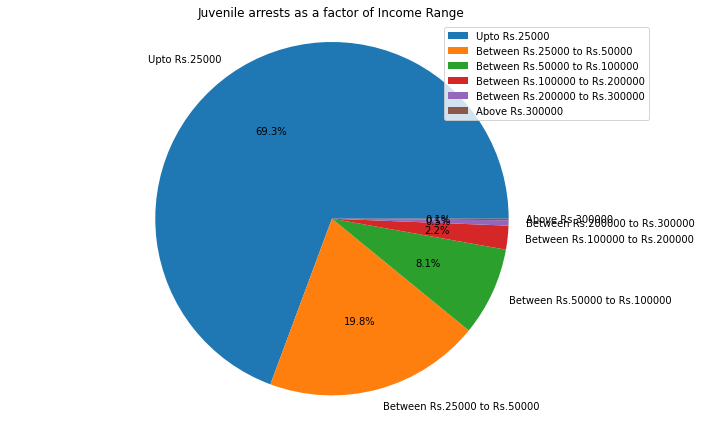

In [ ]:
juvie_inc_group = [
                   'Upto Rs.25000',
                   'Between Rs.25000 to Rs.50000',
                   'Between Rs.50000 to Rs.100000',
                   'Between Rs.100000 to Rs.200000',
                   'Between Rs.200000 to Rs.300000',
                   'Above Rs.300000'
]
juvie_inc_vals = [
                  juvie_economic_setup['Economic_Set_up_Annual_Income_upto_Rs_25000'].sum(),
                  juvie_economic_setup['Economic_Set_up_Annual_Income_250001_to_50000'].sum(),
                  juvie_economic_setup['Economic_Set_up_Middle_income_from_50001_to_100000'].sum(),
                  juvie_economic_setup['Economic_Set_up_Middle_income_from_100001_to_200000'].sum(),
                  juvie_economic_setup['Economic_Set_up_Upper_middle_income_from_200001_to_300000'].sum(),
                  juvie_economic_setup['Economic_Set_up_Upper_income_above_Rs_300000'].sum()
]

plt.figure(figsize=(10, 6))
plt.pie(juvie_inc_vals, labels=juvie_inc_group, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Juvenile arrests as a factor of Income Range')
plt.legend(juvie_inc_group)
plt.tight_layout()
plt.show()

### 4.3 Juvenile arrests as a factor of Family Background

In [ ]:
juvie_family.head()

,Area_Name,Year,Sub_Group_Name,Family_back_ground_Homeless,Family_back_ground_Living_with_guardian,Family_back_ground_Living_with_parents,Family_back_ground_Total
0,Andaman & Nicobar Islands,2001,3. Family Background,0,0,16,16
1,Andhra Pradesh,2001,3. Family Background,552,287,726,1565
2,Arunachal Pradesh,2001,3. Family Background,0,58,79,137
3,Assam,2001,3. Family Background,21,74,158,253
4,Bihar,2001,3. Family Background,43,101,442,586


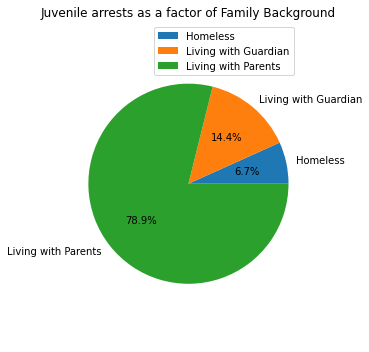

In [ ]:
juvie_family_group = ['Homeless', 'Living with Guardian', 'Living with Parents']
juvie_family_vals = [
                  juvie_family['Family_back_ground_Homeless'].sum(),
                  juvie_family['Family_back_ground_Living_with_guardian'].sum(),
                  juvie_family['Family_back_ground_Living_with_parents'].sum()
]

plt.figure(figsize=(5, 5))
plt.pie(juvie_family_vals, labels=juvie_family_group, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Juvenile arrests as a factor of Family Background')
plt.legend(juvie_family_group)
plt.tight_layout()
plt.show()

### 4.4 Juvenile arrests as a factor of Recdivism

In [ ]:
juvie_recdivism.head()

,Area_Name,Year,Sub_Group_Name,Recidivism_New_Delinquent,Recidivism_Old_Delinquent,Recidivism_Total
0,Andaman & Nicobar Islands,2001,4. Recidivism,16,0,16
1,Andhra Pradesh,2001,4. Recidivism,1392,173,1565
2,Arunachal Pradesh,2001,4. Recidivism,130,7,137
3,Assam,2001,4. Recidivism,248,5,253
4,Bihar,2001,4. Recidivism,576,10,586


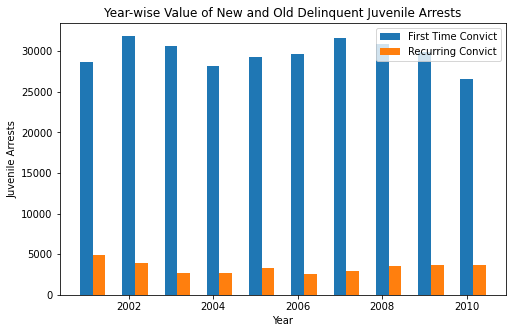

In [ ]:
g4_4 = pd.DataFrame(juvie_recdivism.groupby(['Year'])['Recidivism_New_Delinquent','Recidivism_Old_Delinquent'].sum().reset_index())

width =0.3
plt.figure(figsize=(8, 5))
plt.bar(g4_4['Year'].values, g4_4['Recidivism_New_Delinquent'].values, width=width)
plt.bar(g4_4['Year'].values + width, g4_4['Recidivism_Old_Delinquent'].values, width=width)
plt.xlabel('Year')
plt.ylabel('Juvenile Arrests')
plt.title('Year-wise Value of New and Old Delinquent Juvenile Arrests')
plt.legend(['First Time Convict', 'Recurring Convict'])
plt.show()

### 4.5 Juvenile Arrests through years

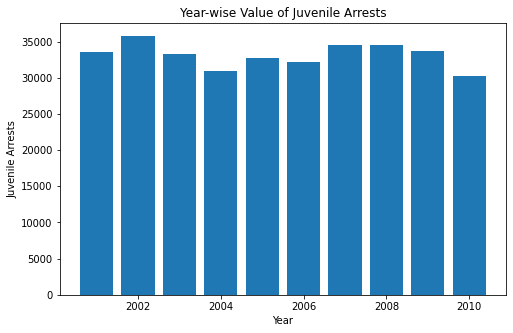

In [ ]:
# We can choose any of the 4 data sources, all have the same count throughout the years.
g4_5 = pd.DataFrame(juvie_education.groupby(['Year'])['Education_Total'].sum().reset_index())

plt.figure(figsize=(8, 5))
plt.bar(g4_5['Year'].values, g4_5['Education_Total'].values)
plt.xlabel('Year')
plt.ylabel('Juvenile Arrests')
plt.title('Year-wise Value of Juvenile Arrests')
plt.show()

## 5. Anti Corruption Cases

In [75]:
# Reading the CSV Files

anti_corruption = pd.read_csv(BASE_PATH + 'india-crime/23_Anti_corruption_cases.csv')

In [76]:
anti_corruption.head()

,Area_Name,Year,AC01_No_of_cases_pending_investigation_from_previous_year,AC02_No_of_cases_registered_during_the_year,AC03_Total_No_of_cases_for_investigation_during_the_year,AC04_No_of_cases_investigated_during_the_year,AC05_No_of_cases_not_investigatedor_in_which_investigation_was_dropped_due_to_any_reason_during_the_year,AC06_No_of_cases_transferred_to_local_police_during_the_year,AC07_No_of_cases_declared_false_mistake_of_fact_or_of_law_or_non_cognizable_or_civil_in_nature,AC08_No_of_cases_in_which_charge_sheets_were_laid_during_the_year,AC09_No_of_cases_pending_departmental_sanction_for_prosecution_during_the_year,AC10_No_of_cases_sent_up_for_trial_and_also_reported_for_departmental_action_during_the_year,AC11_No_of_cases_reported_for_regular_departmental_action_during_the_year,AC12_No_of_cases_reported_for_suitable_action_during_the_year,AC13_No_of_cases_in_which_charge_sheets_were_not_laid_but_final_report_submitted_during_the_year,AC14_No_of_cases_pending_investigation_at_the_end_of_the_year,AC15_No_of_cases_resulted_in_recoveries_or_seizures_during_the_year,AC16_Value_of_property_recoveredseized_during_the_year_in_Rs,AC17_Percentage_of_cases_charge_sheeted_to_total_cases_investigated,AC18_No_of_cases_pending_trial_from_the_previous_year,AC19_No_of_cases_sent_up_for_trial_during_the_year,AC20_Total_No_of_cases_for_trial_during_the_year,AC21_No_of_cases_withdrawn_or_other_wise_disposed_off_on_account_of_death_of_the_accused_during_the_year,AC22_No_of_cases_in_which_trials_were_completed_during_the_year,AC23_No_of_cases_convicted_during_the_year,AC24_No_of_cases_acquitted_or_discharged_during_the_year,AC25_No_of_cases_pending_trial_at_the_end_of_the_year,AC26_Percentage_of_cases_convicted_to_cases_in_which_trials_were_completed_during_the_year,AC27_Total_amount_of_fine_imposed_during_the_year_in_Rs
0,Rajasthan,2010,740.0,576.0,1316.0,1316.0,0.0,0.0,0.0,281.0,196.0,126.0,126.0,48.0,70.0,965.0,225.0,1481450.0,0.0,1817.0,281.0,2098.0,8.0,57.0,11.0,46.0,2033.0,0.0,33750.0
1,Maharashtra,2010,724.0,528.0,1252.0,1252.0,2.0,0.0,4.0,446.0,250.0,1.0,37.0,0.0,26.0,780.0,155.0,28841870.0,0.0,2042.0,446.0,2488.0,5.0,366.0,68.0,298.0,2117.0,0.0,383000.0
2,Maharashtra,2003,509.0,521.0,1030.0,1030.0,3.0,3.0,1.0,479.0,237.0,0.0,2.0,0.0,44.0,520.0,154.0,9114731.0,0.0,2602.0,479.0,3081.0,5.0,396.0,113.0,283.0,2680.0,0.0,404600.0
3,Tamil Nadu,2009,347.0,498.0,845.0,845.0,0.0,0.0,0.0,156.0,90.0,67.0,115.0,19.0,243.0,492.0,182.0,10466646.0,0.0,308.0,156.0,464.0,13.0,52.0,26.0,26.0,399.0,0.0,149300.0
4,Maharashtra,2001,505.0,497.0,1002.0,1002.0,2.0,6.0,6.0,472.0,199.0,1.0,8.0,0.0,27.0,491.0,32.0,7993106.0,0.0,2321.0,472.0,2793.0,3.0,287.0,97.0,190.0,2503.0,0.0,1061500.0


### 5.1 State wise Anti-corruption Cases

In [80]:
g5_1 = pd.DataFrame(anti_corruption.groupby(['Area_Name'])['AC03_Total_No_of_cases_for_investigation_during_the_year', 'AC08_No_of_cases_in_which_charge_sheets_were_laid_during_the_year', 'AC22_No_of_cases_in_which_trials_were_completed_during_the_year'].sum().reset_index())
g5_1.columns = ['State/UT','Cases_Investigated', 'Cases_Chargesheeted', 'Completed_Trial']
g5_1.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)
telangana = {
    'State/UT' : 'Telangana',
    'Cases_Investigated' : g5_1.loc[g5_1['State/UT'] == 'Andhra Pradesh']['Cases_Investigated'].values[0],
    'Cases_Chargesheeted' : g5_1.loc[g5_1['State/UT'] == 'Andhra Pradesh']['Cases_Chargesheeted'].values[0],
    'Completed_Trial' : g5_1.loc[g5_1['State/UT'] == 'Andhra Pradesh']['Completed_Trial'].values[0]
}
g5_1 = g5_1.append(telangana, ignore_index=True)

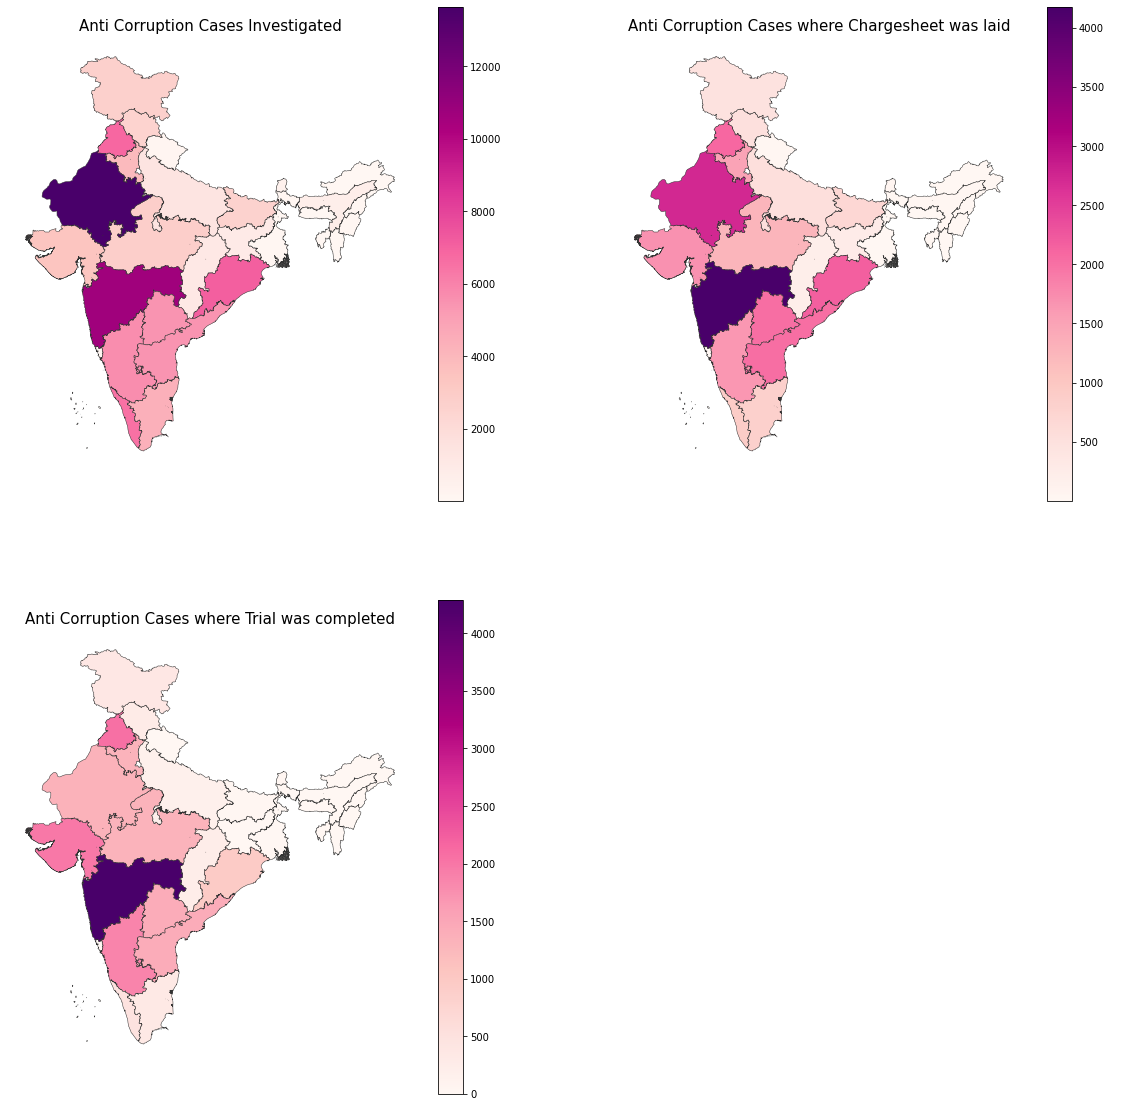

In [81]:
# Create Sub-plots
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

# Read in the India States info
shp_gdf = gpd.read_file(BASE_PATH + 'india-gis/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g5_1.set_index('State/UT'))

# To plot the Anti Corruption Cases Investigated across states
ax[0][0].axis('off')
ax[0][0].set_title('Anti Corruption Cases Investigated', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases_Investigated', cmap='RdPu', linewidth=0.5, ax=ax[0][0], edgecolor='0.2',legend=True)

# To plot the Anti Corruption Cases where Chargesheet was laid across states
ax[0][1].axis('off')
ax[0][1].set_title('Anti Corruption Cases where Chargesheet was laid', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases_Chargesheeted', cmap='RdPu', linewidth=0.5, ax=ax[0][1], edgecolor='0.2',legend=True)

# To plot the Anti Corruption Cases where Trial was completed across states
ax[1][0].axis('off')
ax[1][0].set_title('Anti Corruption Cases where Trial was completed', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Completed_Trial', cmap='RdPu', linewidth=0.5, ax=ax[1][0], edgecolor='0.2',legend=True)

# To turn off the axis on the 4th sub-plot
_ = ax[1][1].axis('off')

### 5.2 Anti Corruption Cases across the years

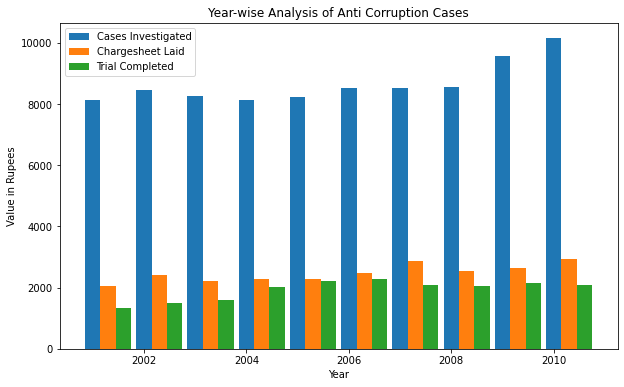

In [15]:
g5_2 = pd.DataFrame(anti_corruption.groupby(['Year'])['AC03_Total_No_of_cases_for_investigation_during_the_year', 'AC08_No_of_cases_in_which_charge_sheets_were_laid_during_the_year', 'AC22_No_of_cases_in_which_trials_were_completed_during_the_year'].sum().reset_index())

width =0.3
plt.figure(figsize=(10, 6))
plt.bar(g5_2['Year'].values, g5_2['AC03_Total_No_of_cases_for_investigation_during_the_year'].values, width=width)
plt.bar(g5_2['Year'].values + width, g5_2['AC08_No_of_cases_in_which_charge_sheets_were_laid_during_the_year'].values, width=width)
plt.bar(g5_2['Year'].values + (2*width), g5_2['AC22_No_of_cases_in_which_trials_were_completed_during_the_year'].values, width=width)
plt.xlabel('Year')
plt.ylabel('Value in Rupees')
plt.title('Year-wise Analysis of Anti Corruption Cases')
plt.legend(['Cases Investigated', 'Chargesheet Laid', 'Trial Completed'])
plt.show()

## 6. Use of FireArms in Murder Cases

In [50]:
# Reading the CSV Files

murder_firearm = pd.read_csv(BASE_PATH + 'india-crime/34_Use_of_fire_arms_in_murder_cases.csv')
murder_firearm.head()

,Area_Name,Year,Victims_of_Murder_by_Fire_arms,Victims_of_Murder_by_Licensed_arms,Victims_of_Murder_by_Un_licensedImprovisedCrudeCountry_made_Arms_Etc
0,Uttar Pradesh,2004,4969,437.0,4532.0
1,Uttar Pradesh,2002,4098,403.0,3695.0
2,Uttar Pradesh,2006,2565,330.0,2235.0
3,Uttar Pradesh,2003,3855,317.0,3538.0
4,Uttar Pradesh,2008,1470,261.0,1209.0


### 6.1 State/UT Wise Murder cases through the Discharge of Firearms

In [71]:
g6_1 = pd.DataFrame(murder_firearm.groupby(['Area_Name'])['Victims_of_Murder_by_Fire_arms'].sum().reset_index())
g6_1.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)
telangana = {'Area_Name' : 'Telangana', 'Victims_of_Murder_by_Fire_arms' : g6_1.loc[g6_1['Area_Name'] == 'Andhra Pradesh']['Victims_of_Murder_by_Fire_arms'].values[0]}
g6_1 = g6_1.append(telangana, ignore_index=True)

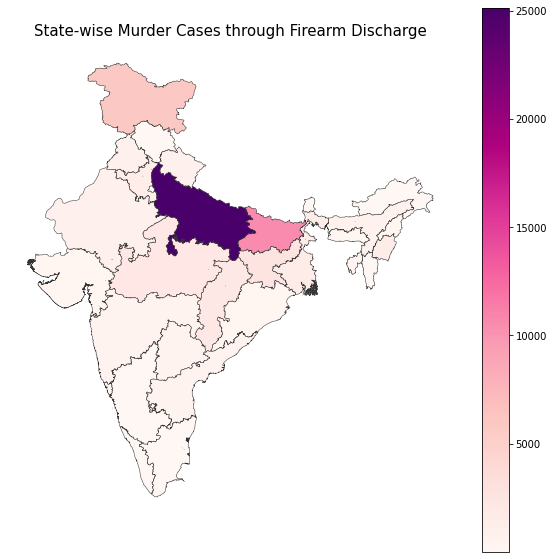

In [73]:
shp_gdf = gpd.read_file(BASE_PATH + 'india-gis/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g6_1.set_index('Area_Name'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Murder Cases through Firearm Discharge', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Victims_of_Murder_by_Fire_arms', cmap='RdPu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

### 6.2 Firearm Licencing

We analyse the percent of murders that have occured due to licensed vs un-licensed firearms.

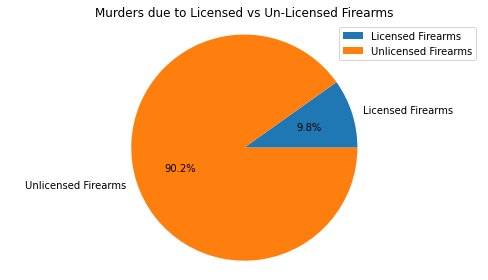

In [59]:
firearm_murder_group = ['Licensed Firearms', 'Unlicensed Firearms']
firearm_murder_vals = [
                  murder_firearm['Victims_of_Murder_by_Licensed_arms'].sum(),
                  murder_firearm['Victims_of_Murder_by_Un_licensedImprovisedCrudeCountry_made_Arms_Etc'].sum()
]

plt.figure(figsize=(7, 4))
plt.pie(firearm_murder_vals, labels=firearm_murder_group, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Murders due to Licensed vs Un-Licensed Firearms')
plt.legend(firearm_murder_group)
plt.tight_layout()
plt.show()

### 6.3 Year-Wise Analysis of Murder by Firearm Cases

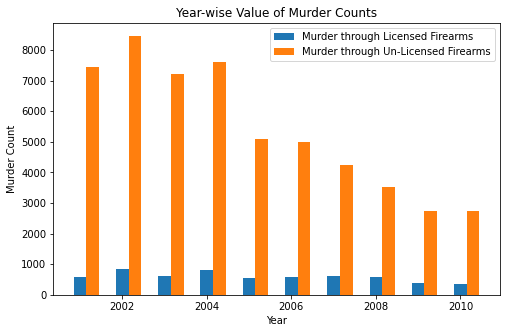

In [61]:
g6_3 = pd.DataFrame(murder_firearm.groupby(['Year'])['Victims_of_Murder_by_Licensed_arms','Victims_of_Murder_by_Un_licensedImprovisedCrudeCountry_made_Arms_Etc'].sum().reset_index())

width =0.3
plt.figure(figsize=(8, 5))
plt.bar(g6_3['Year'].values, g6_3['Victims_of_Murder_by_Licensed_arms'].values, width=width)
plt.bar(g6_3['Year'].values + width, g6_3['Victims_of_Murder_by_Un_licensedImprovisedCrudeCountry_made_Arms_Etc'].values, width=width)
plt.xlabel('Year')
plt.ylabel('Murder Count')
plt.title('Year-wise Value of Murder Counts')
plt.legend(['Murder through Licensed Firearms', 'Murder through Un-Licensed Firearms'])
plt.show()